<a href="https://colab.research.google.com/github/KhmAsif/IMSE441Spring24/blob/main/Lab_6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

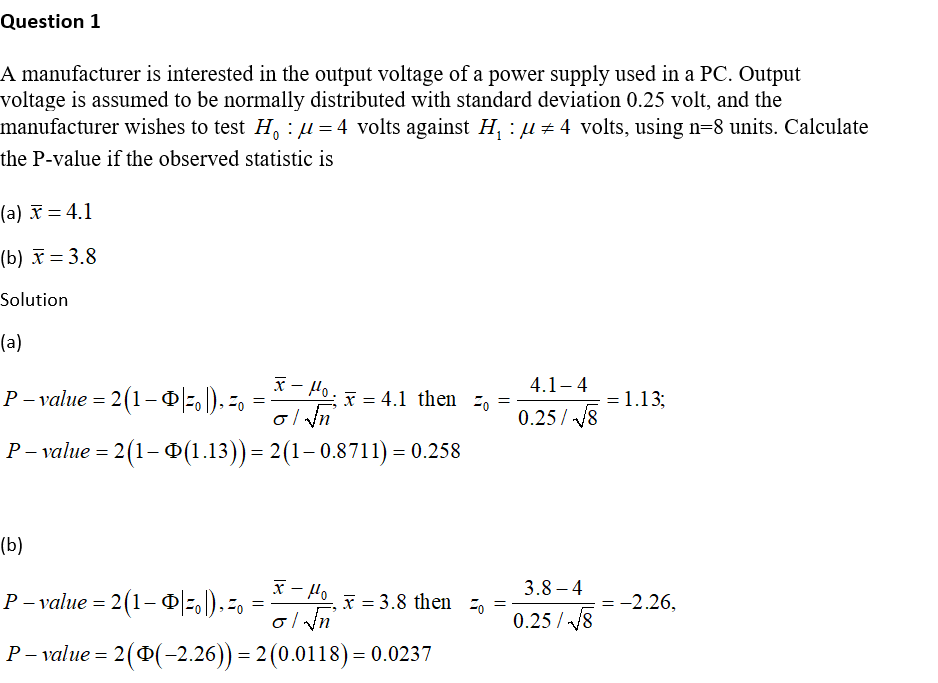

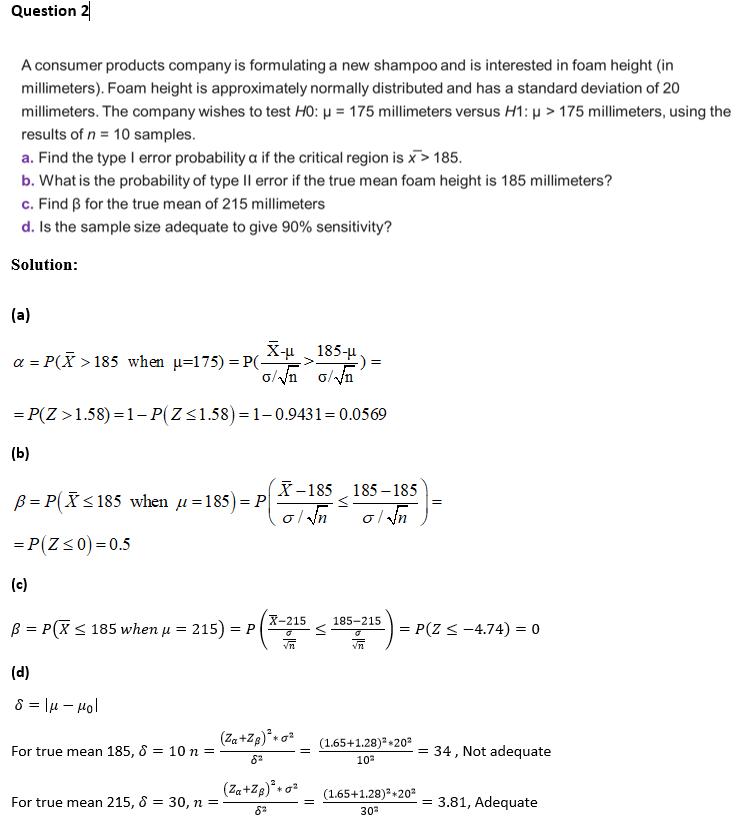

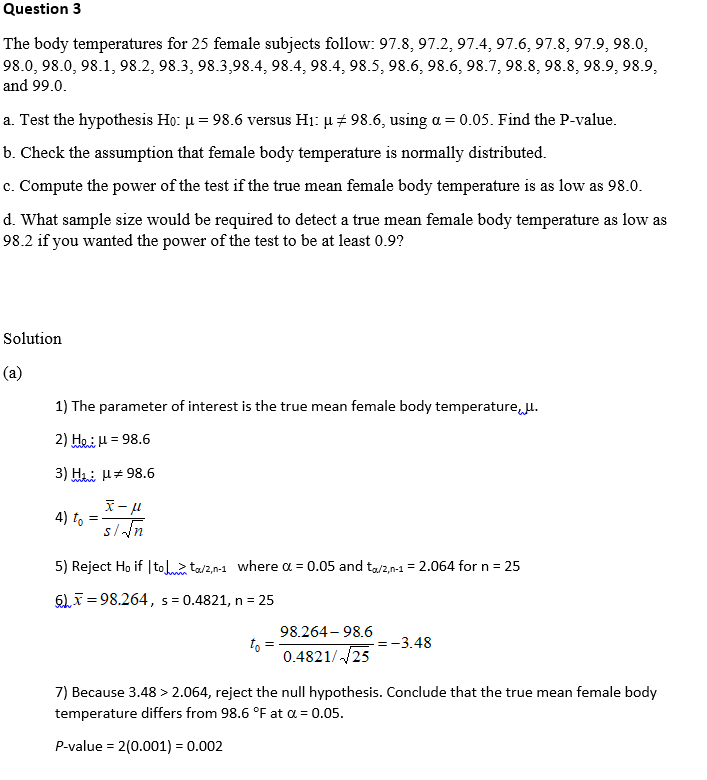

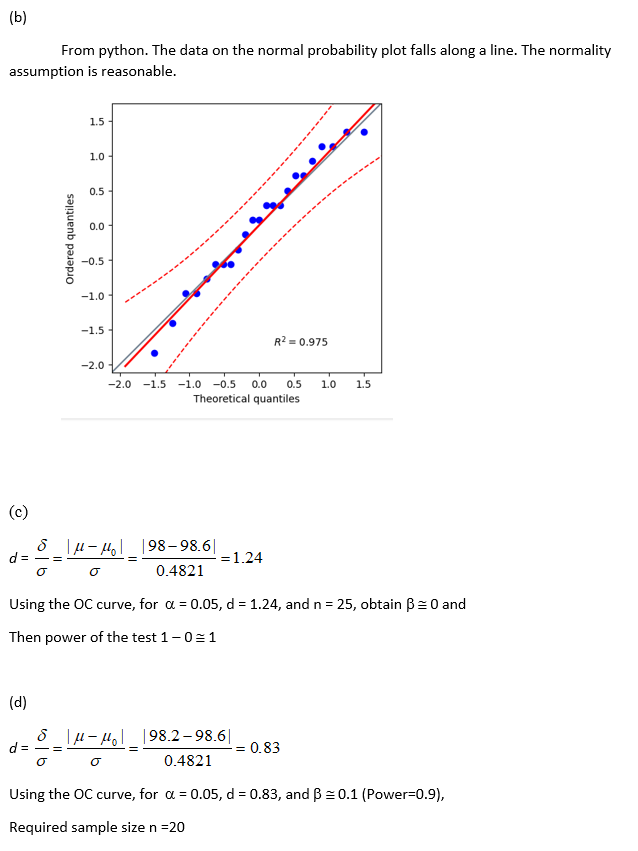

# Python Part

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp
import math
!pip install pingouin
import pingouin as pg

# **Question 2**

In [ ]:
#(a) Find the type 1 error probability
crit= 185
H0= 175
sigma=20
n=10
z_stat=(crit-H0)/(sigma/math.sqrt(10))
error= 1-stats.norm.cdf(z_stat)
print('type 1 error probability', error)

type 1 error probability 0.056923149003329065


In [ ]:
#(b) Find the type 2 error probability
crit= 185
t_mean= 185
sigma=20
n=10
z_stat=(crit-t_mean)/(sigma/math.sqrt(10))
error= 1-stats.norm.cdf(z_stat)
print('type 2 error probability', error)

type 2 error probability 0.5


In [ ]:
#(b)
from statsmodels.stats.power import TTestIndPower
power_analysis = TTestIndPower()
d_ratio=(185-175)/20
power = power_analysis.power(effect_size = .763, alpha = 0.05, nobs1=10, alternative = 'larger')
beta= 1-power
# Print results
print('Type 2 error probability is', beta)

Type 2 error probability is 0.5013077199226057


In [ ]:
#(C)
d_ratio=(215-175)/20
power = power_analysis.power(effect_size = d_ratio, alpha = 0.05, nobs1=10, alternative = 'larger')
beta= 1-power
# Print results
print('Type 2 error probability is', beta)

Type 2 error probability is 0.0040101725066636895


In [ ]:
#(D)
d_ratio=(215-175)/20
sample_size = power_analysis.solve_power(effect_size = d_ratio, alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 5


In [ ]:
d_ratio=(185-175)/20
sample_size = power_analysis.solve_power(effect_size = d_ratio, alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 69


**Question 3**

In [ ]:
temp = 97.8, 97.2, 97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9, 99.0

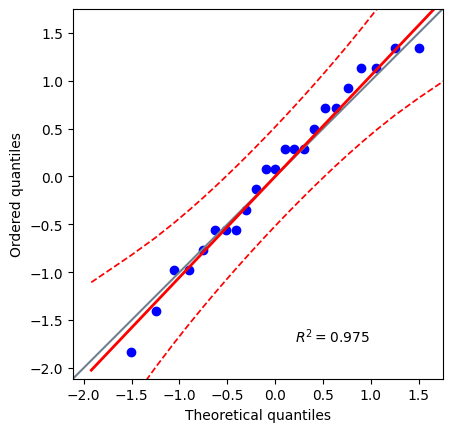

In [ ]:
#Normality check
pg.qqplot(temp)
plt.show()

In [ ]:
#(a)
ttest_1samp(a=temp, popmean=98.6)

TtestResult(statistic=-3.484907217309078, pvalue=0.0019124143827446436, df=24)

P value is less than alpha. So we reject Null Hypothesis. So mean female body temperature differs from 98.6 F

In [ ]:
#B already done

In [ ]:
#C Power
d_ratio=abs(98-98.6)/np.std(temp)
power = power_analysis.power(effect_size = d_ratio, alpha = 0.05, nobs1=25, alternative = 'two-sided')
# Print results
print('Power of the test is', power)


Power of the test is 0.9926488758409697


In [ ]:
#d sample size
d_ratio=abs(98.2-98.6)/np.std(temp)
sample_size = power_analysis.solve_power(effect_size = d_ratio, alpha = 0.05, power = 0.9, alternative = 'two-sided')
print('The sample size required is', round(sample_size))

The sample size required is 30


**Question 4**

Two different samples. Each had different test prototypes. So the samples are independent

In [ ]:
from scipy.stats import ttest_ind

In [ ]:

C_1= 251, 255, 258, 257, 250, 251, 254, 250, 248
C_2= 250, 253, 249, 256, 259, 252, 260, 251
df1=len(C_1)-1
df2=len(C_2)-1

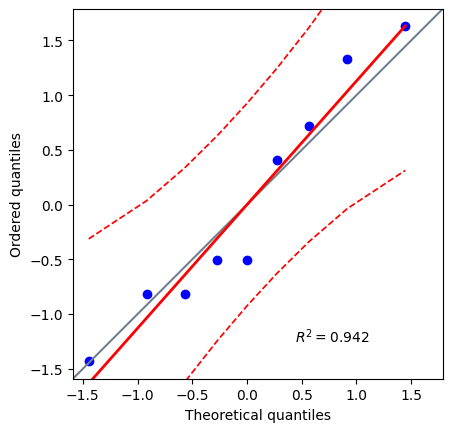

In [ ]:
#Normality check
pg.qqplot(C_1)
plt.show()

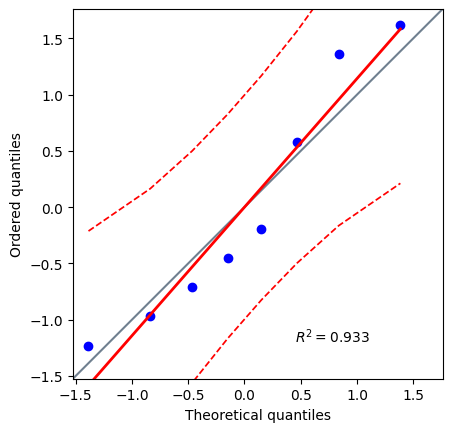

In [ ]:
#Normality check
pg.qqplot(C_2)
plt.show()

In [ ]:
#Equal Variance check
np.var(C_1)

10.666666666666666

In [ ]:
np.var(C_2)

14.9375

In [ ]:
F=np.var(C_2)/np.var(C_1)
alpha=0.05
P_value=1-stats.f.cdf(F, df1, df2)
print( 'F value:', F, 'P value:', P_value)
if P_value > alpha:
  print('Fail Reject null hypothesis: Variance equal')
else :
  print ('Reject null hypothesis: Variance not equal')

F value: 1.400390625 P value: 0.3351015597333704
Fail Reject null hypothesis: Variance equal


In [ ]:
#Hypothesis test
ttest_ind(a=C_1, b= C_2, equal_var= True)

TtestResult(statistic=-0.5882011727513358, pvalue=0.5651491115341096, df=15.0)

P value is too high. So we fail to reject null hypothesis. So there is no significant difference in heat gain

**Question 5**

In [ ]:
#a
Low = 242, 249, 235, 250, 254, 244, 258, 311, 237, 261, 314, 252
High= 302, 421, 419, 399, 317, 311, 350, 363, 392, 367, 301, 302

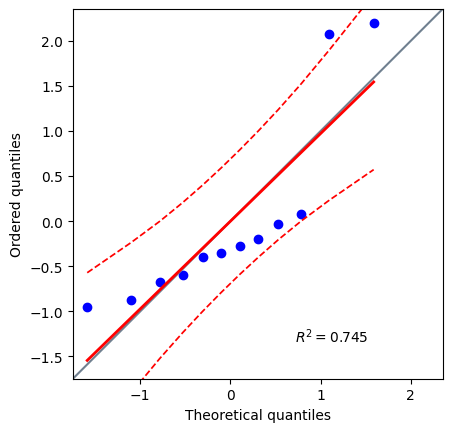

In [ ]:
#Normality check
pg.qqplot(Low)
plt.show()

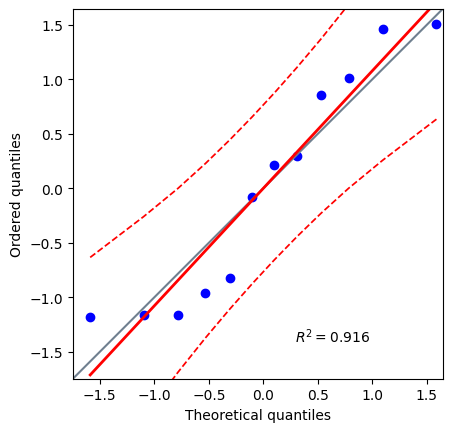

In [ ]:
#Normality check
pg.qqplot(High)
plt.show()

In [ ]:
#Equal Variance check
np.var(Low)

630.2430555555555

In [ ]:
#Equal Variance check
np.var(High)

1990.2222222222224

In [ ]:
F=np.var(High)/np.var(Low)
alpha=0.05
P_value=1-stats.f.cdf(F, df1, df2)
print( 'F value:', F, 'P value:', P_value)
if P_value > alpha:
  print('Fail Reject null hypothesis: Variance equal')
else :
  print ('Reject null hypothesis: Variance not equal')

F value: 3.1578645804638867 P value: 0.07374468062726491
Fail Reject null hypothesis: Variance equal


Although the F test says the variance is equal the p value is close to alpha value. That's why I would not be comfortable saying varaince equal

In [ ]:
#Hypothesis test
ttest_ind(a=Low, b= High, equal_var= True)

TtestResult(statistic=-6.138840596507603, pvalue=3.529500405795358e-06, df=22.0)

In [ ]:
#Hypothesis test
ttest_ind(a=Low, b= High, equal_var= False)

TtestResult(statistic=-6.1388405965076025, pvalue=1.0030002748470512e-05, df=17.331783854463563)

P value is less than alpha . So mean is not the same meaning the mean actually increases with vibration

**Question 6**

Same student set before and after data. So they are related/dependent

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441Spring24/main/Lab_6_Data.csv')
before = 22, 20, 19, 24, 25, 25, 28, 22, 30, 27, 24, 18, 16, 19, 19, 28, 24, 25, 25, 23
after = 24, 22, 19, 22, 28, 26, 28, 24, 30, 29, 25, 20, 17, 18, 18, 28, 26, 27, 27, 24

NameError: name 'Grades_before' is not defined

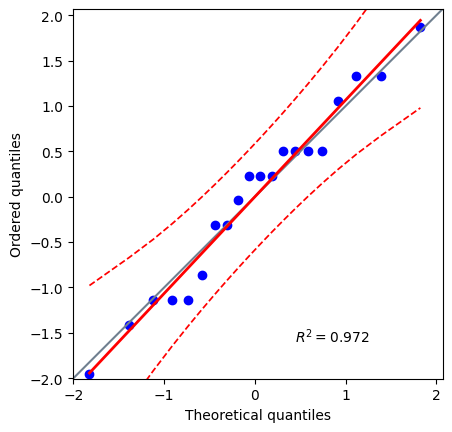

In [ ]:
#Normality check
pg.qqplot(before)
plt.show()

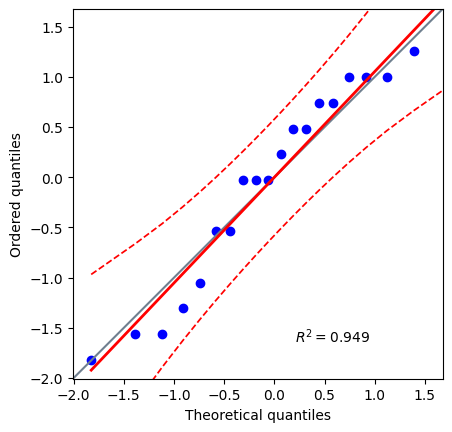

In [ ]:
#Normality check
pg.qqplot(after)
plt.show()

In [ ]:
#Hypothesis test
ttest_rel(a = before, b = after)

TtestResult(statistic=-3.22617331116718, pvalue=0.004445370704412229, df=19)

The pvalue of 0.0044 is less than 0.05 so we reject the null hypothesis meaning that there is evidence to say that scores were influenced by lab session